In [2]:
import sys
sys.path.insert(0, '/home/ejafari/alignment/Git/src/')
from utils import *
from AIscEA import *
from evals import *
from rmCls import *
from similarity import *
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Clusterign RNA and ATAC

AnnData object with n_obs × n_vars = 36601 × 12012
AnnData object with n_obs × n_vars = 12012 × 36601
12012
36601
AnnData object with n_obs × n_vars = 12012 × 27080
    obs: 'n_genes'
    var: 'n_cells'
12012
27080
View of AnnData object with n_obs × n_vars = 12012 × 27080
    obs: 'n_genes'
    var: 'n_cells'


Trying to set attribute `.obs` of view, copying.


View of AnnData object with n_obs × n_vars = 12012 × 4335
    obs: 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'


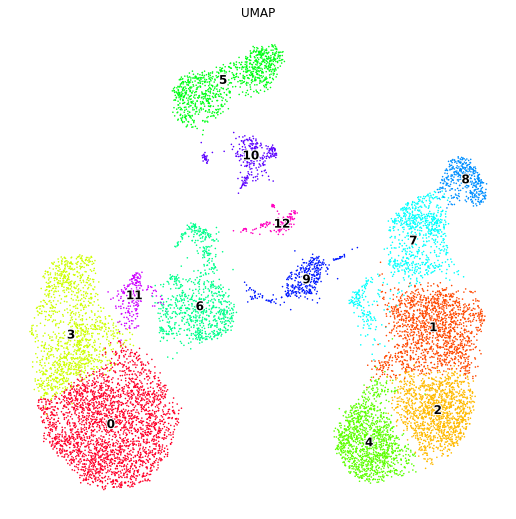

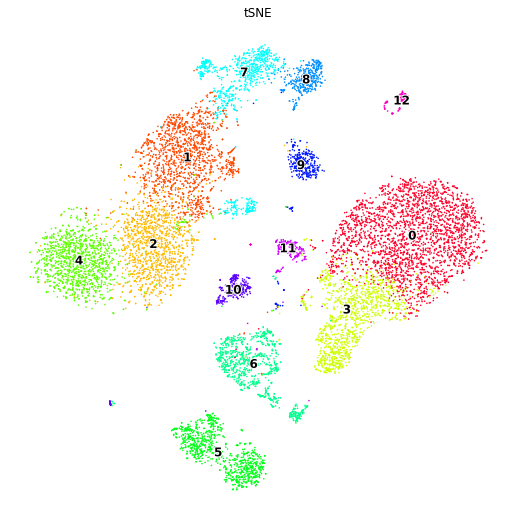

0 : 2638
1 : 1473
2 : 1291
3 : 1281
4 : 1268
5 : 941
6 : 894
7 : 865
8 : 380
9 : 364
10 : 276
11 : 196
12 : 145


In [4]:
############################ High_var = True ######################################
input_dir = "/home/ejafari/alignment/downstream/data/PBMC_10k/mine/rna.csv"
# Find marker genes of scRNAseq data
markers_rna, rna = scRNAseq_clustering_original(input_dir, filtering=True, resl=0.46, highly_var=True, tr=True, n_pc=15)


# 20 neigh (default) cosine 15 PCs

AnnData object with n_obs × n_vars = 5 × 12012
AnnData object with n_obs × n_vars = 12012 × 5


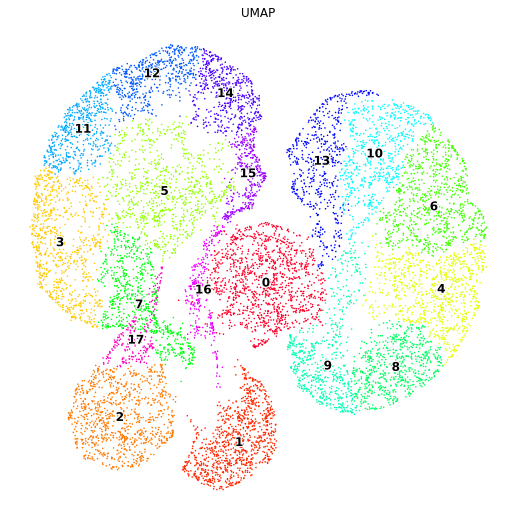

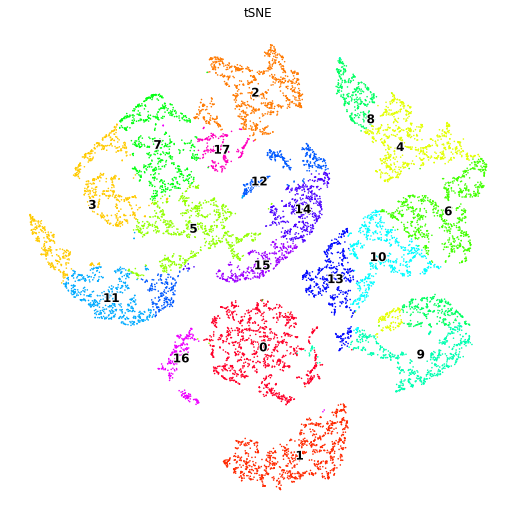

0 : 1184
1 : 960
2 : 905
3 : 864
4 : 861
5 : 852
6 : 824
7 : 695
8 : 649
9 : 615
10 : 608
11 : 563
12 : 540
13 : 536
14 : 517
15 : 353
16 : 266
17 : 220


In [5]:
# Find clusters of low dimensional cisTopic result for scATACseq

input_dir = "/home/ejafari/alignment/downstream/data/PBMC_10k/mine/"
atac = clustering(input_dir + 'atac_topics.tsv', transpose=True, resl=0.38)


############################ scATAC ######################################
# 1) Put cisTopic clusters and embedding values on the original data and 2) find marker genes and their logFC
input_dir = "/home/ejafari/alignment/downstream/data/PBMC_10k/mine/"
f_original = 'pred_matrix_closest_genes_1k_downstream_strand_first_prom.csv'
markers_atac, atac_cis_on_org = process_cisTopic_on_orig(atac, f_original, input_dir, save=False, transpose=True)

# To match name of the cells in RNA and ATAC data
atac_cis_on_org.obs.index = [i.replace('.','-') for i in atac_cis_on_org.obs.index] 

# Cell-type mapping

In [6]:
rna, atac_cis_on_org,  markers_rna, markers_atac = rm_tiny_cluster(rna, atac_cis_on_org,markers_rna, markers_atac, min_cells=200, rm_correspondence=False)

RNA: 11
RNA: 12


In [7]:
col_ind, rna, atac_cis_on_org = extract_mapped_clusters(rna, markers_rna, atac_cis_on_org, markers_atac, p_val_count=6)

0.0
0.0 [ 9  5 11 13 12  1  4 17  2  0 16]
[ 9  5 11 13 12  1  4 17  2  0 16]
P-value:  {(9, 0): 0.0, (7, 17): 0.0, (10, 16): 0.0, (6, 4): 0.0, (5, 1): 0.0, (1, 5): 0.0010000000000000009, (3, 13): 0.0, (4, 12): 0.0010000000000000009, (0, 9): 0.0, (8, 2): 0.0, (2, 11): 0.0}
$$$$$$$ 
 
0.1
0.1 [ 4  5  3 13 14  1  9 17  2  0 16]
[ 4  5  3 13 14  1  9 17  2  0 16]
P-value:  {(9, 0): 0.0, (7, 17): 0.0, (10, 16): 0.0, (6, 9): 0.0, (1, 5): 0.0, (5, 1): 0.0, (3, 13): 0.0010000000000000009, (4, 14): 0.0020000000000000018, (0, 4): 0.006000000000000005, (8, 2): 0.0, (2, 3): 0.0}
$$$$$$$ 
 
0.2
0.2 [ 4  5  3 13 15  1  6 17  2  0 16]
[ 4  5  3 13 15  1  6 17  2  0 16]
P-value:  {(9, 0): 0.0, (6, 6): 0.0, (7, 17): 0.0, (3, 13): 0.0, (5, 1): 0.0, (10, 16): 0.0010000000000000009, (1, 5): 0.0010000000000000009, (4, 15): 0.0, (0, 4): 0.0, (8, 2): 0.0, (2, 3): 0.0}
$$$$$$$ 
 
0.30000000000000004
0.3 [ 9  4 13 12 14  0  3 16  1  5 15]
[ 9  4 13 12 14  0  3 16  1  5 15]
P-value:  {(9, 6): 0.0, (7, 17): 0.0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,4.0,0.0,0.0
5,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
8,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Mapped clusters between Domain1 and Domain2:  {1: 5, 3: 13, 5: 1, 7: 17, 8: 2, 10: 16}

Removing non-significant clusters.


In [8]:
print(rna.shape, atac_cis_on_org.shape)


# Number of shared cells
len(set(rna.obs.index) & set(atac_cis_on_org.obs.index))

(5216, 4335) (3739, 19289)


3187

In [12]:
# sc.pl.umap(atac_cis_on_org, color=['leiden'], legend_loc='on data', legend_fontsize=18, legend_fontoutline=4,frameon=True, title='UMAP ATACseq', palette='gist_rainbow', save='UMAP_ATAC_10k_selected.svg')#
# sc.pl.umap(rna, color=['leiden'], legend_loc='on data', legend_fontsize=18, legend_fontoutline=4,frameon=True, title='UMAP RNAseq', palette='gist_rainbow', save='UMAP_RNA_10k_selected.svg')#

## Cluster mapping score: Jaccard and overlap coefficient

In [10]:
# Double check the true mappings using cell labels
import pickle
import pandas as pd
df_cells_common = pd.DataFrame(columns=['overlap', 'union', 'jacc', 'overlap/min'])
out_dir = "/home/ejafari/alignment/downstream/notebooks/FW_cluster_cell_names/PBMC_10k/"
cls_overlap_dict = dict()

for cls_rna in sorted(set(rna.obs['leiden'])):
    cls_atac = str(col_ind[int(cls_rna)])
    cells_atac  = atac_cis_on_org.obs[atac_cis_on_org.obs['leiden'] == str(cls_atac)].index
    cells_rna = rna.obs[rna.obs['leiden'] == str(cls_rna)].index
    overlap = set(cells_atac) & set(cells_rna)
    n_overlapping = len(overlap)
    cls_overlap_dict[cls_rna + "_" + cls_atac] = overlap
    

        
    n_union = len(set(cells_rna).union(cells_atac))
    jacc = n_overlapping/n_union
    overlap_min = n_overlapping/min(len(cells_rna), len(cells_atac))
    df_cells_common.loc['r_' + str(cls_rna) + '_a_' + str(cls_atac)] = [n_overlapping, n_union, jacc, overlap_min]

    print(cls_rna, cls_atac, len(cells_rna), len(cells_atac), n_union, n_overlapping, jacc) 
    
    # Save overlapping cell names in mapped clusters
with open(out_dir + 'overlap_mapped_clusters.pickle', 'wb') as handle:
    pickle.dump(cls_overlap_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
   
overlap_coef = dict()
for k, v in dict(df_cells_common['overlap/min']).items():
    overlap_coef[k.split("_")[1] + "_" + k.split("_")[-1]] = round(v, 3)    
print(overlap_coef)


df_cells_common



1 5 1473 852 1673 652 0.38971906754333535
10 16 276 266 298 244 0.8187919463087249
3 13 1281 536 1666 151 0.09063625450180073
5 1 941 960 974 927 0.9517453798767967
7 17 865 220 909 176 0.1936193619361936
8 2 380 905 927 358 0.3861920172599784
{'1_5': 0.765, '10_16': 0.917, '3_13': 0.282, '5_1': 0.985, '7_17': 0.8, '8_2': 0.942}


,overlap,union,jacc,overlap/min
r_1_a_5,652.0,1673.0,0.389719,0.765258
r_10_a_16,244.0,298.0,0.818792,0.917293
r_3_a_13,151.0,1666.0,0.090636,0.281716
r_5_a_1,927.0,974.0,0.951745,0.985122
r_7_a_17,176.0,909.0,0.193619,0.800000
r_8_a_2,358.0,927.0,0.386192,0.942105


In [35]:
df_cells_common['overlap/min'].values

array([0.77112676, 0.91729323, 0.31156716, 0.98512221, 0.8       ,
       0.94210526])

In [36]:
# sc.pl.umap(atac_cis_on_org, color=['leiden'], legend_loc='on data', legend_fontsize=18, legend_fontoutline=4,frameon=True, title='UMAP ATACseq', palette='gist_rainbow', save='UMAP_ATAC_3k_selected.svg')#
# sc.pl.umap(rna, color=['leiden'], legend_loc='on data', legend_fontsize=18, legend_fontoutline=4,frameon=True, title='UMAP RNAseq', palette='gist_rainbow', save='UMAP_RNA_3k_selected.svg')#

# Cell-cell alignment

In [13]:
aligns_dict = AIscEA(col_ind, rna, markers_rna, atac_cis_on_org, markers_atac)

0
6323 1906
108550 19289
1 5
After combining multi-cells:  (852, 879)
3 13
After combining multi-cells:  (536, 995)
5 1
After combining multi-cells:  (941, 16168)
7 17
After combining multi-cells:  (220, 775)
8 2
After combining multi-cells:  (380, 18180)
10 16
After combining multi-cells:  (266, 861)
------------------------after RNA-ATAC similarity----------------------
------------------------before FW----------------------
Inside calc_foscttm: 
652
Check:  1473 852 5
Inside calc_foscttm, adata_atac_k: 
1473 852 680 0.08407901415599797 785 0.19976607559338347 0.14192254487469072
Inside calc_foscttm: 
151
Check:  1281 536 13
Inside calc_foscttm, adata_atac_k: 
1281 536 152 0.051130342635111264 151 0.19319681889359475 0.122163580764353
Inside calc_foscttm: 
927
Check:  941 960 1
Inside calc_foscttm, adata_atac_k: 
941 960 938 0.09160000572401655 939 0.12523824908503803 0.10841912740452729
Inside calc_foscttm: 
176
Check:  865 220 17
Inside calc_foscttm, adata_atac_k: 
865 220 783 0.21

In [42]:
import pickle
import os

# Save fracs_all1 and fracs_all2
print(len(fracs1_all), len(fracs2_all))
out_dir = "/home/ejafari/alignment/downstream/notebooks/PBMC_10k/FW_res/"


params = str(n_neigh) + "_" + str(lev) + "_" + str(l)  + "_" + str(n_iter)
with open(out_dir + params + '_fracs1.pickle', 'wb') as handle:
    pickle.dump(fracs1_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(out_dir + params + '_fracs2.pickle', 'wb') as handle:
    pickle.dump(fracs2_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(out_dir + "FW_PBMC_10k.txt", "a+") as myfile:
    myfile.write(str(n_neigh) + '\t' + str(lev) + '\t' + str(l)  + '\t' + str(n_iter)  + '\t' + str(final_foscttm1)  + '\t' + str(final_foscttm2) + '\t' + str(duration) + '\n')




3208 3208
